In [1]:
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
moons = make_moons()

In [4]:
moons_x, moons_y = moons

In [6]:
moons_y.shape

(100,)

In [7]:
moons_x[0]

array([ 0.32769911, -0.240278  ])

In [9]:
moons_x_df = pd.DataFrame(moons_x)

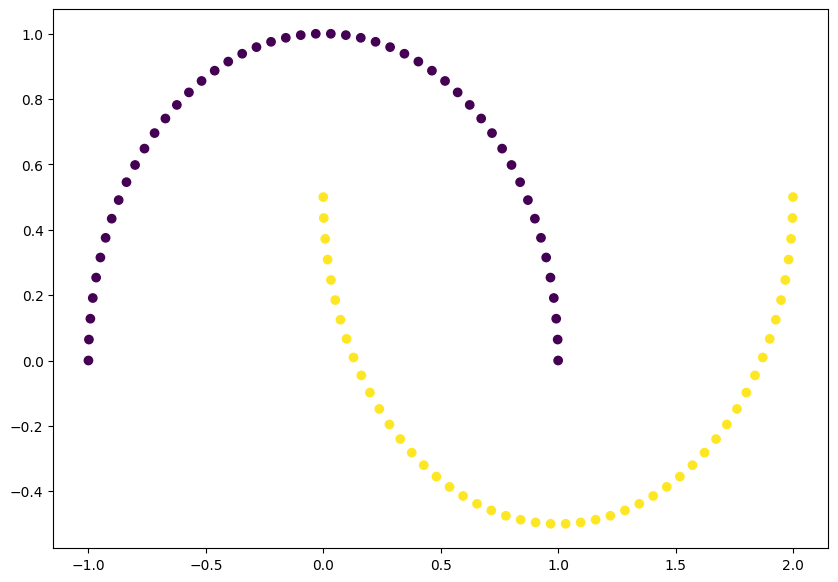

In [13]:
figure = plt.figure(figsize=(10,7))
plt.scatter(moons_x[:, 0], moons_x[:, 1], c=moons_y)
plt.title("All data")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(moons_x, moons_y, test_size=0.2)

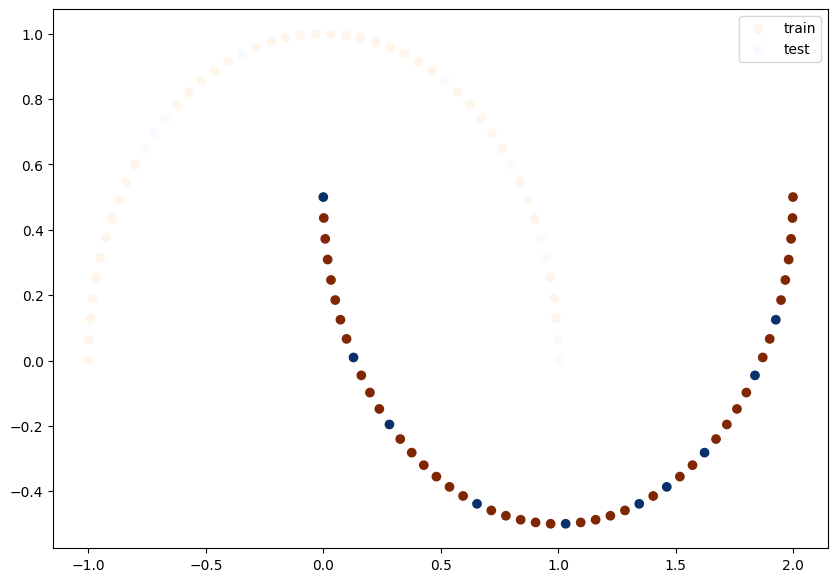

In [17]:
figure = plt.figure(figsize=(10,7))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, label='train', cmap='Oranges')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, label='test', cmap='Blues')
plt.legend()
plt.show()

In [66]:
early_call = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

In [67]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
history1 = model1.fit(x_train, y_train, epochs = 100, callbacks=[early_call],
                     verbose=0)

In [68]:
model1.evaluate(x_test, y_test)

1/1 [==============================] - 0s 85ms/step - loss: 0.1616 - accuracy: 0.9000


[0.1616014689207077, 0.8999999761581421]

In [47]:
history1.history.keys()

dict_keys(['loss', 'accuracy'])

In [70]:
history_df = pd.DataFrame(history1.history)

<Axes: >

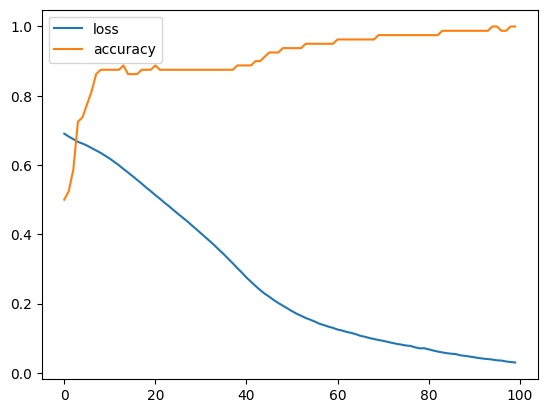

In [71]:
history_df.plot()

In [42]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 559us/step
doing binary classifcation...


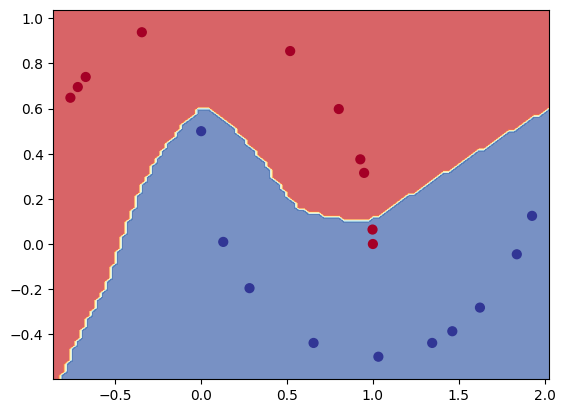

In [72]:
plot_decision_boundary(model1, x_test, y_test)

In [73]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model1.predict(x_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

1/1 [==============================] - 0s 15ms/step


array([[ 8,  2],
       [ 0, 10]], dtype=int64)

In [62]:
tf.round(y_preds)[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [1.],
       [1.]], dtype=float32)>